# Depression prediction

In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy
import pandas as pd
from pandas import read_csv
from pandas import set_option
import seaborn
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

## 1. Load the dataset

In [7]:
dataset = pd.read_csv('depression_data.csv')
dataset.index = dataset['Survey_id']
dataset = dataset.drop(['Survey_id'], axis = 1)
dataset

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
Survey_id,,,,,,,,,,,,,,,,,,,,,
926,91,1,28,1,4,10,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
747,57,1,23,1,3,8,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1190,115,1,22,1,3,9,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1065,97,1,27,1,2,10,4,52667108,19698904,49647648,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
806,42,0,59,0,4,10,6,82606287,17352654,23399979,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,22,1,25,1,1,7,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
547,69,1,28,1,4,10,6,15711078,24023054,15506558,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
893,184,1,66,0,0,1,1,42440731,22861940,22562605,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1


## 2. Analyze data

In [8]:
#dimensions of the dataset
dataset.shape

(1429, 22)

We have 1429 instances to work with and can conﬁrm the data has 22 attributes including the output attribute charges.

In [9]:
#data types of each attribute
dataset.dtypes

Ville_id                   int64
sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object

We can see that all of the attributes are numeric (float)

In [10]:
#peak of the data
dataset.head(20)

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
Survey_id,,,,,,,,,,,,,,,,,,,,,
926,91,1,28,1,4,10,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
747,57,1,23,1,3,8,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1190,115,1,22,1,3,9,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1065,97,1,27,1,2,10,4,52667108,19698904,49647648,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
806,42,0,59,0,4,10,6,82606287,17352654,23399979,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
483,25,1,35,1,6,10,8,35937466,736707,23399979,...,0,1,0,1,22688441,18907036,0,4442561,76629095.0,0
849,130,0,34,0,1,9,3,41303144,21925041,23399979,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
1386,72,1,21,1,2,10,4,12013633,20323505,48046108,...,0,0,1,0,9275569,36979933,0,33922659,54600174.0,0
930,195,1,32,1,7,9,9,11087568,25224208,80076851,...,1,0,0,0,32564587,28738691,1,14018381,15117619.0,0


In [11]:
#summarize the distribution of each attribute
set_option('precision', 2)
dataset.describe()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00,1429.00,1429.00,1429.00,1429.00,1429.00,1429.00,1.43e+03,1.43e+03,1.43e+03,...,1429.00,1429.00,1429.00,1429.00,1.43e+03,1.43e+03,1429.00,1.43e+03,1.41e+03,1429.00
mean,76.29,0.92,34.78,0.77,2.88,8.69,4.97,3.36e+07,2.72e+07,2.74e+07,...,0.18,0.25,0.11,0.26,3.45e+07,3.55e+07,0.21,3.30e+07,3.36e+07,0.17
std,66.44,0.27,13.99,0.42,1.87,2.92,1.79,2.00e+07,1.82e+07,1.78e+07,...,0.38,0.43,0.31,0.44,2.08e+07,2.11e+07,0.41,2.12e+07,2.16e+07,0.37
min,1.00,0.00,17.00,0.00,0.00,1.00,1.00,3.25e+05,1.63e+05,1.73e+05,...,0.00,0.00,0.00,0.00,3.25e+05,2.72e+05,0.00,7.43e+04,1.26e+05,0.00
25%,24.00,1.00,25.00,1.00,2.00,8.00,4.00,2.33e+07,1.93e+07,2.34e+07,...,0.00,0.00,0.00,0.00,2.32e+07,2.28e+07,0.00,2.00e+07,2.06e+07,0.00
50%,57.00,1.00,30.00,1.00,3.00,9.00,5.00,2.89e+07,2.29e+07,2.34e+07,...,0.00,0.00,0.00,0.00,3.00e+07,3.14e+07,0.00,2.84e+07,2.83e+07,0.00
75%,105.00,1.00,42.00,1.00,4.00,10.00,6.00,3.72e+07,2.66e+07,2.34e+07,...,0.00,1.00,0.00,1.00,4.00e+07,4.35e+07,0.00,3.98e+07,4.15e+07,0.00
max,292.00,1.00,91.00,1.00,11.00,19.00,12.00,9.91e+07,9.96e+07,9.99e+07,...,1.00,1.00,1.00,1.00,9.98e+07,9.97e+07,1.00,9.94e+07,9.97e+07,1.00


We now have a better feeling for how diﬀerent the attributes are. The min and max values as well are the means vary a lot. We are likely going to get better results by rescaling the data in some way.

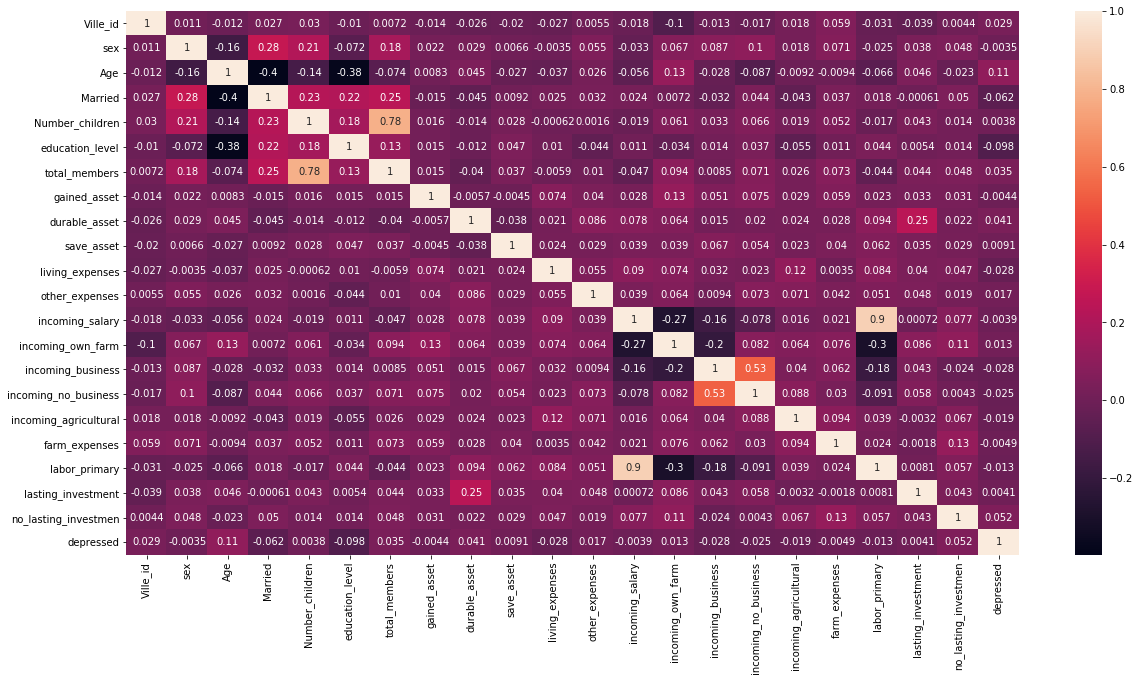

In [12]:
#take a look at the correlation between all of the numeric attributes
set_option('precision', 2)
pyplot.figure(figsize=(20,10))
seaborn.heatmap(dataset.corr(method='pearson'), annot=True)
pyplot.show()

## 3. Data visualizations
### 3.1. Unimodal data visualizations
Let’s look at visualizations of individual attributes. It is often useful to look at your data using multiple diﬀerent visualizations in order to spark ideas.

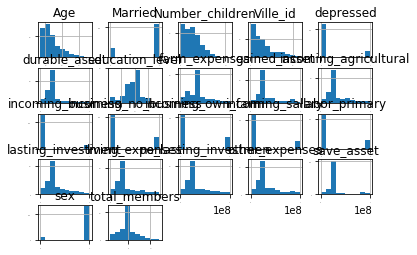

In [13]:
#histograms
#pyplot.figure(figsize=(20,10))
dataset.hist(sharex=False, sharey=False, xlabelsize=1, layout=(5,5), ylabelsize=1)
#pyplot.figure(figsize=(20,10))
pyplot.show()

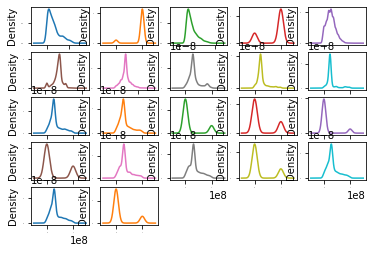

In [14]:
#density plots
#pyplot.figure(figsize=(20,10))
dataset.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=False, fontsize=1)
pyplot.show()

This perhaps adds more evidence to our suspicion about possible exponential and bimodal distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

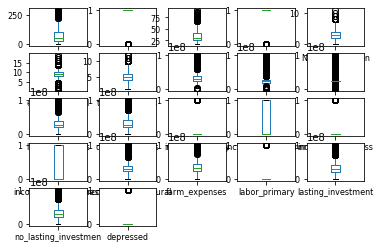

In [15]:
#box and whiskers plots
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, fontsize=8)
#pyplot.figure()
pyplot.show()

### 3.2. Multimodal data visualizations
Let’s look at some visualizations of the interactions between variables. The best place to start is a scatter plot matrix.

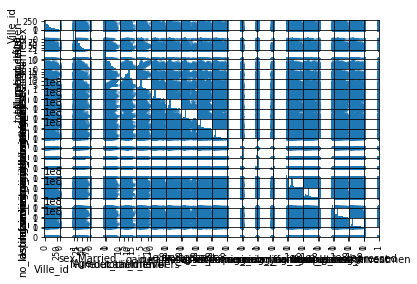

In [16]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [21]:
dataset.isnull().values.any()

False

In [22]:
dataset = dataset.dropna()
dataset.shape

(1409, 22)

In [23]:
#quick look at the breakdown of class values
dataset.groupby('depressed').size()

depressed
0    1174
1     235
dtype: int64

## 4. Validation dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to conﬁrm the accuracy of our ﬁnal model. It is a smoke test that we can use to see if we messed up and to give us conﬁdence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [24]:
#split-out validation dataset
array = dataset.values
X = dataset.drop(['depressed'], axis=1).values
Y = dataset['depressed'].astype('category').values
val_size = 0.2
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((1127, 21), (1127,), (282, 21), (282,))

## 5. Evaluate algorithms: baseline
We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. I have no idea. Let’s design our test harness. We will use 10-fold cross-validation. The dataset is not too small and this is a good standard test harness conﬁguration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [27]:
num_folds = 10
seed = 7
scoring = 'accuracy'

Let’s create a baseline of performance on this problem and spot-check a number of diﬀerent algorithms. We will select a suite of diﬀerent algorithms capable of working on this regression problem. The six algorithms selected include:
- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
- Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [28]:
#spot-check algorithms
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.826896 (+-0.033055)
LDA: 0.826896 (+-0.033055)
KNN: 0.804733 (+-0.034544)
CART: 0.696515 (+-0.051015)
NB: 0.802995 (+-0.024929)
SVM: 0.826896 (+-0.033055)


Let’s take a look at the distribution of scores across all cross-validation folds by algorithm.

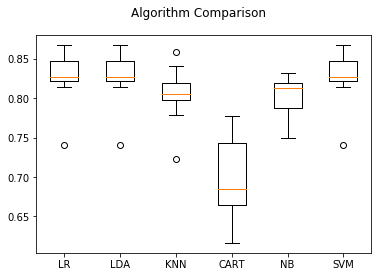

In [29]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Best models: SVM, LR and LDA (0.8268)

## 6. Evaluate algorithms: Standardization
We suspect that the diﬀering scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [30]:
#standardize the dataset
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.826896 (+-0.033055)
ScaledLDA: 0.826896 (+-0.033055)
ScaledKNN: 0.804741 (+-0.028811)
ScaledCART: 0.688535 (+-0.042652)
ScaledNB: 0.779930 (+-0.025189)
ScaledSVM: 0.826896 (+-0.033055)


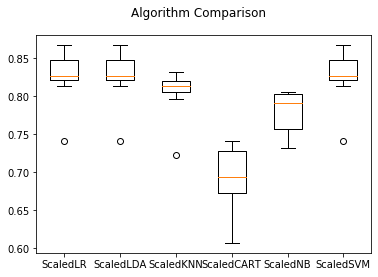

In [31]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We obtain the same results: SVM, LR and LDA (0.8268)

In [42]:
#standardize the dataset
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('SVM', SVC())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.826896 (+-0.033055)
ScaledLDA: 0.826896 (+-0.033055)
ScaledKNN: 0.811805 (+-0.033475)
ScaledCART: 0.684118 (+-0.049514)
ScaledNB: 0.779930 (+-0.025189)
ScaledSVM: 0.826896 (+-0.033055)


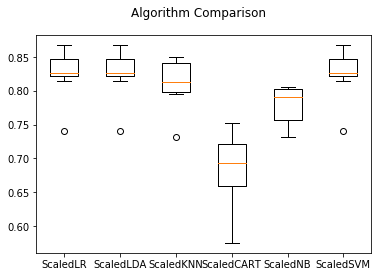

In [43]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We obtain the same results: SVM, LR and LDA (0.8268)

## 7. Improve results with tunning
We know from the results in the previous section that LR achieves good results on the dataset. But can it do better.

In [44]:
#LDA algorithm tunning
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
normalizer = MinMaxScaler().fit(X_train)
X_train = normalizer.transform(X_train)
kernel_values = ['svd', 'lsqr', 'eigen']
param_grid = dict(solver=kernel_values)
model = LinearDiscriminantAnalysis()
kfol = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
#print the results of the param grid
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.826896 using {'solver': 'svd'}
0.826896 (0.033055) with: {'solver': 'svd'}
0.826896 (0.033055) with: {'solver': 'lsqr'}
0.826896 (0.033055) with: {'solver': 'eigen'}


You can see that the best values are sovler = 'svd' (0.8268)

In [45]:
#SVM algorithm tunning
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
normalizer = MinMaxScaler().fit(X_train)
X_train = normalizer.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
#print the results of the param grid
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.826896 using {'C': 0.1, 'kernel': 'linear'}
0.826896 (0.033055) with: {'C': 0.1, 'kernel': 'linear'}
0.826896 (0.033055) with: {'C': 0.1, 'kernel': 'poly'}
0.826896 (0.033055) with: {'C': 0.1, 'kernel': 'rbf'}
0.826896 (0.033055) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.826896 (0.033055) with: {'C': 0.3, 'kernel': 'linear'}
0.826896 (0.033055) with: {'C': 0.3, 'kernel': 'poly'}
0.826896 (0.033055) with: {'C': 0.3, 'kernel': 'rbf'}
0.814467 (0.034322) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.826896 (0.033055) with: {'C': 0.5, 'kernel': 'linear'}
0.825126 (0.030726) with: {'C': 0.5, 'kernel': 'poly'}
0.826896 (0.033055) with: {'C': 0.5, 'kernel': 'rbf'}
0.804725 (0.031960) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.826896 (0.033055) with: {'C': 0.7, 'kernel': 'linear'}
0.822464 (0.029145) with: {'C': 0.7, 'kernel': 'poly'}
0.826896 (0.033055) with: {'C': 0.7, 'kernel': 'rbf'}
0.794991 (0.025596) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.826896 (0.033055) with: {'C': 0.9, 'kernel': 'line

Best results 0.8269 (C=0.1, kernel='linear')

In [35]:
#LR algorithm tunning
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
normalizer = MinMaxScaler().fit(X_train)
X_train = normalizer.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
iters = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
kernels = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = dict(C=c_values, solver=kernels, max_iter=iters)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
#print the results of the param grid
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.826896 using {'C': 0.1, 'max_iter': 50, 'solver': 'newton-cg'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 50, 'solver': 'newton-cg'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 50, 'solver': 'lbfgs'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 50, 'solver': 'liblinear'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 50, 'solver': 'sag'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 50, 'solver': 'saga'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 100, 'solver': 'sag'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 150, 'solver': 'newton-cg'}
0.826896 (0.033055) with: {'C': 0.1, 'max_iter': 150, 'solver': 'lbfgs'}
0.826896 (0.033055) with: {'C': 0.1, 'max_it

Best results 0.8268 (C=0.1, max_iter=50, solver=newton-cg)

## 8. Ensemble methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four diﬀerent ensemble machine learning algorithms, two boosting and two bagging methods:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).
We will use the same test harness as before, 10-fold cross-validation and pipelines that standardize the training data for each fold.

### 8.1 Without standardization

In [36]:
#ensembles
ensembles = dict()
ensembles['AB'] = AdaBoostClassifier()
ensembles['GBM'] = GradientBoostingClassifier()
ensembles['RF'] = RandomForestClassifier()
ensembles['ET'] = ExtraTreesClassifier()
#evaluate each model in turn
results = []
names = []
for name, model in ensembles.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

AB: 0.795868 (+-0.032165)
GBM: 0.810043 (+-0.035609)
RF: 0.826011 (+-0.030566)
ET: 0.821579 (+-0.031607)


We can see that we’re generally getting better scores than our linear and nonlinear algorithms in previous sections.

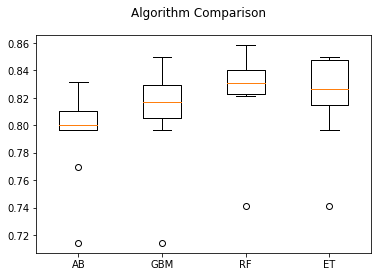

In [37]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It looks like RF regressor has the better score (0.8260)

In [38]:
#ensembles
ensembles = dict()
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in ensembles.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledAB: 0.795875 (+-0.029001)
ScaledGBM: 0.811828 (+-0.034305)
ScaledRF: 0.824249 (+-0.030903)
ScaledET: 0.819809 (+-0.032457)


We can see that we’re not getting better scores than our linear and nonlinear algorithms in previous sections.

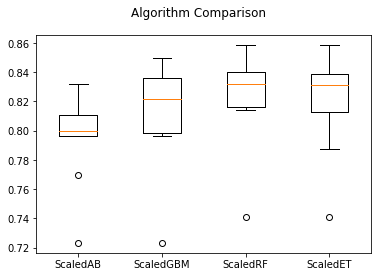

In [39]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
#ensembles
ensembles = dict()
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('Normalizer', MinMaxScaler()),('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('RF', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('Normalizer', MinMaxScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in ensembles.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledAB: 0.802094 (+-0.032275)
ScaledGBM: 0.813598 (+-0.034379)
ScaledRF: 0.826019 (+-0.031783)
ScaledET: 0.822464 (+-0.031754)


## 10. Finalize model
In this section we will ﬁnalize the SVC model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [48]:
#prepare and train the model
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
normalizer = MinMaxScaler().fit(X_train)
X_train = normalizer.transform(X_train)
model = SVC(C=0.1, kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
#transform the validation dataset
X_val = scaler.transform(X_val)
X_val = normalizer.transform(X_val)
#make predictions
predictions = model.predict(X_val)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.20212765957446807
[[ 17 225]
 [  0  40]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.13       242
           1       0.15      1.00      0.26        40

    accuracy                           0.20       282
   macro avg       0.58      0.54      0.20       282
weighted avg       0.88      0.20      0.15       282



Text(0.5, 1, 'Confusion matrix')

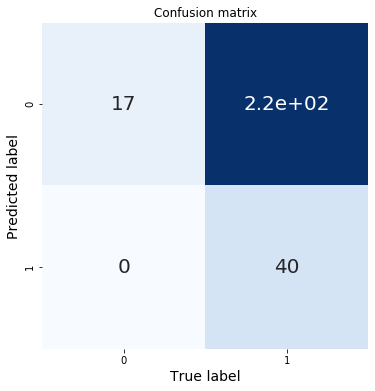

In [50]:
#plot the confusion matrix
pyplot.figure(figsize = (8,6))
seaborn.heatmap(confusion_matrix(Y_val, predictions), square=True, annot=True, annot_kws={"size": 20},
                cmap=pyplot.cm.Blues, cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])
pyplot.xlabel('True label', fontsize=14)
pyplot.ylabel('Predicted label', fontsize=14)
pyplot.title('Confusion matrix')

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

No handles with labels found to put in legend.


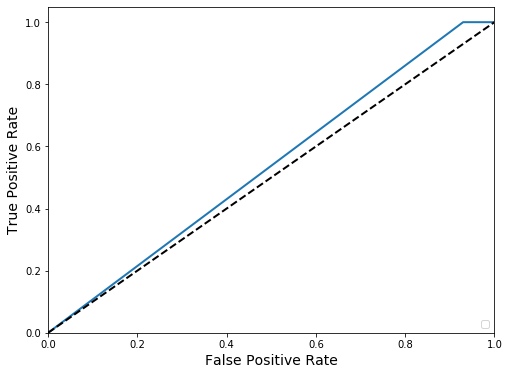

AUC:  0.5351239669421488


In [52]:
y_prob = model.predict_proba(X_val)
lb = LabelBinarizer()
y_test = lb.fit_transform(Y_val)
#Compute and plot ROC curve and ROC area for each class
pyplot.figure(figsize = (8,6))
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
pyplot.plot(fpr, tpr, lw=2)
pyplot.plot([0, 1], [0, 1], 'k--', lw=2)
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate', fontsize=14)
pyplot.ylabel('True Positive Rate', fontsize=14)
#plt.title('ROC Curves for subject %d' % (subject), fontisize=18)
pyplot.legend(loc="lower right")
pyplot.show()
print('AUC: ', roc_auc)